## Capstone Project: Statistical Data Anlaysis

The problem of the project is to predict the severity of the car accident from the other given variables. Prior to this step of the project, we have cleaned and the data of the US Car Accidents 2016-2019. In this step, we will observe some visualization techniques that which variables may affect the severity of the accidents more.

In [1]:
# Import required libraries
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the csv file that was cleaned in the prior project:
df = pd.read_csv(r'C:\\Users\Servet\Desktop\Jupyter_Notebooks\US_Accidents_cleaned1.csv')

In [3]:
#Check the head of the DataFrame
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),...,Hour,Weekday,Nautical_Twilight_isnull,Sunrise_Sunset_isnull,Civil_Twilight_isnull,Astronomical_Twilight_isnull,Weather_Timestamp_isnull,Wind_Direction_isnull,Visibility(mi)_isnull,Number_isnull
0,0,A-1,MapQuest,201,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,...,5,Mon,0,0,0,0,0,0,0,1
1,1,A-2,MapQuest,201,2,2016-02-08 06:07:00,2016-02-08 06:37:00,39.928059,-82.831184,0.01,...,6,Mon,0,0,0,0,0,0,0,0
2,2,A-3,MapQuest,201,2,2016-02-08 06:49:00,2016-02-08 07:19:00,39.063148,-84.032608,0.01,...,6,Mon,0,0,0,0,0,0,0,1
3,3,A-4,MapQuest,201,3,2016-02-08 07:23:00,2016-02-08 07:53:00,39.747753,-84.205582,0.01,...,7,Mon,0,0,0,0,0,0,0,1
4,4,A-5,MapQuest,201,2,2016-02-08 07:39:00,2016-02-08 08:09:00,39.627781,-84.188354,0.01,...,7,Mon,0,0,0,0,0,0,0,1


In [4]:
# Check the name and the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 73 columns):
Unnamed: 0                      1048575 non-null int64
ID                              1048575 non-null object
Source                          1048575 non-null object
TMC                             1048575 non-null int64
Severity                        1048575 non-null int64
Start_Time                      1048575 non-null object
End_Time                        1048575 non-null object
Start_Lat                       1048575 non-null float64
Start_Lng                       1048575 non-null float64
Distance(mi)                    1048575 non-null float64
Description                     1048575 non-null object
Number                          1048575 non-null float64
Street                          1048575 non-null object
Side                            1048575 non-null object
City                            1048548 non-null object
County                          1048575 non-nu

### 1. What is the correlation between numerical variables and severity

Firstly we will check how the distribution of the severity

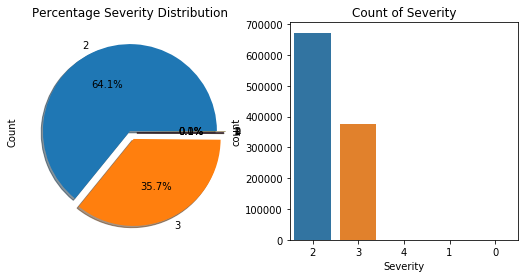

In [5]:
# Percent of severity
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

This distribution suggest that the majority of the severities of accidents are labeled as 2 or 3.

We can perform a heatmap to check which of the "float64" and "int64"(not dummy variables) columns are correlated with the severity the most.

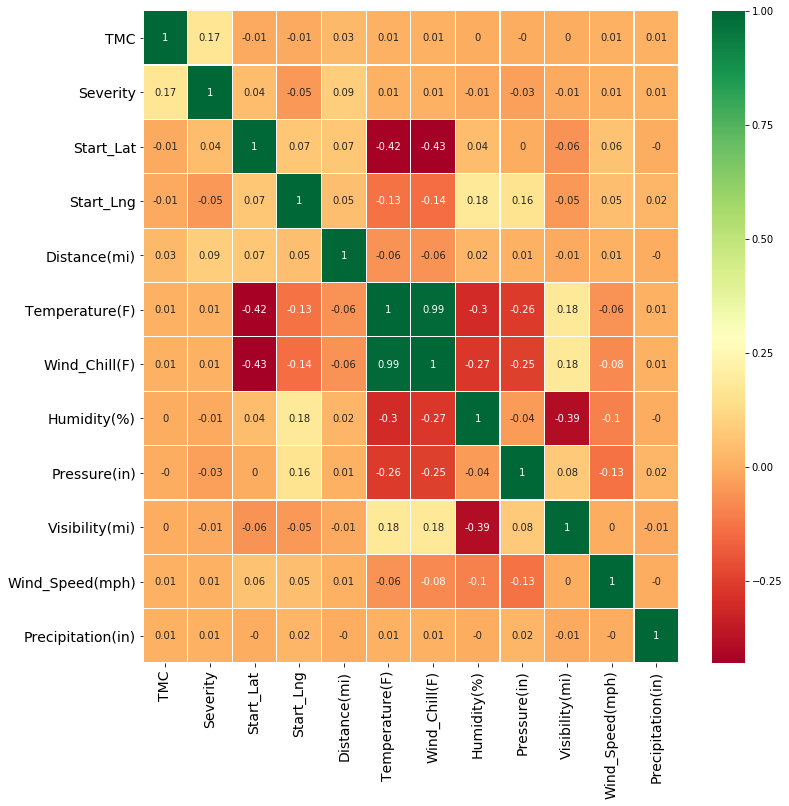

In [6]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
# Seaborn Heatmap cuts the top and bottom rows to half,to fix the error, y_lims are changed
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This heatmap does not suggest any strong correlation between a numerical variable and severity of an accident.

### 2. What is the relationship between location and the severity of accidents?

The second question is how the number and severity of accidents are associated with the location. The first graph we used to see the number of accidents for each state:

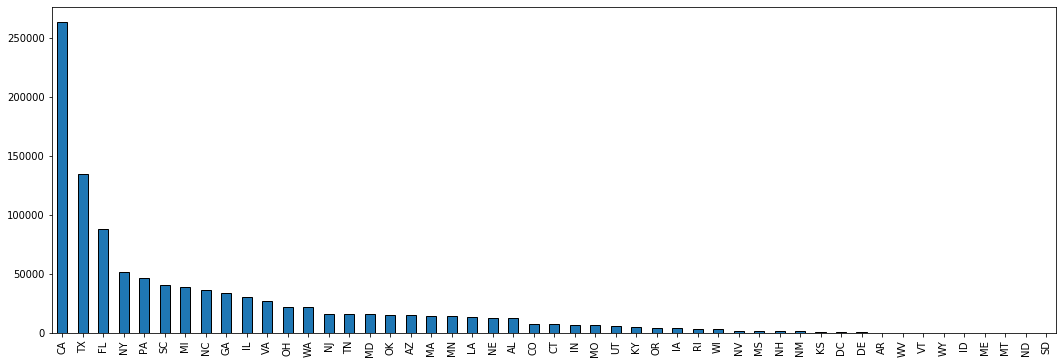

In [7]:
# Firstly, we will check the distribution of the accidents ove the states
plt.figure(figsize=(18,6))
df['State'].value_counts().plot(kind='bar', edgecolor = 'k')

We can observe from this graph that the number of accidents significantly differ from state to state. However, the other part of the question is whether the severity of an accident is associated with the state or not. In order to answer this question, we will check the distribution of the severities of the accidents in 10 states with the highest number of accidents.

In [8]:
# We will find 10 states with the highest number of accidents:
df.State.value_counts().head(10)

CA    262792
TX    134798
FL     87834
NY     51447
PA     46897
SC     40692
MI     39175
NC     36314
GA     33844
IL     30097
Name: State, dtype: int64

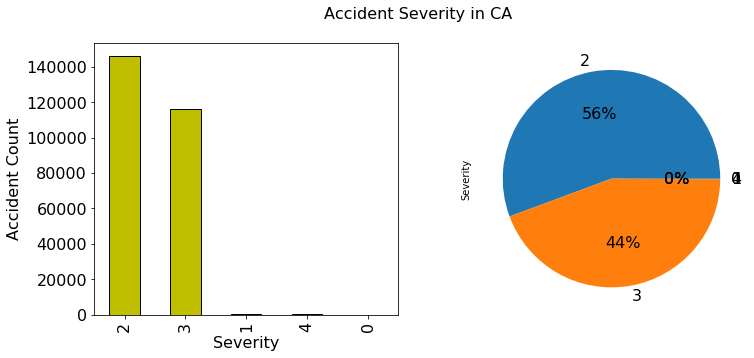

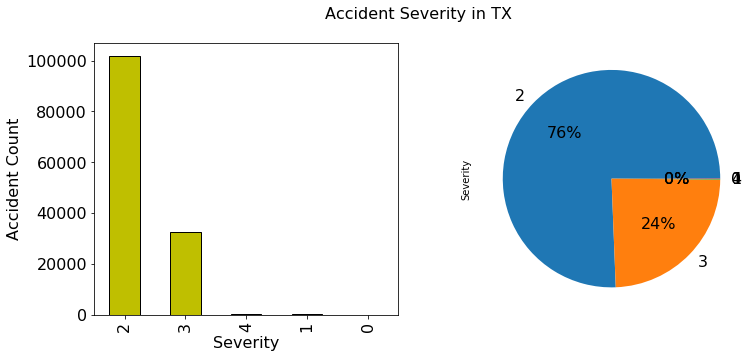

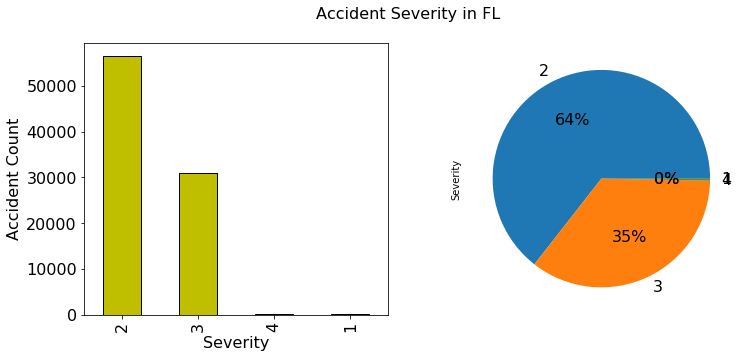

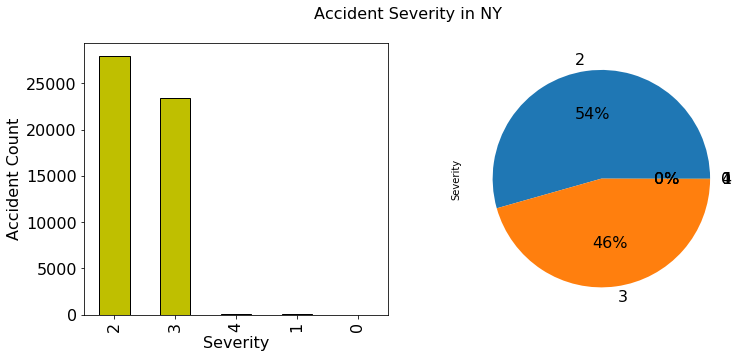

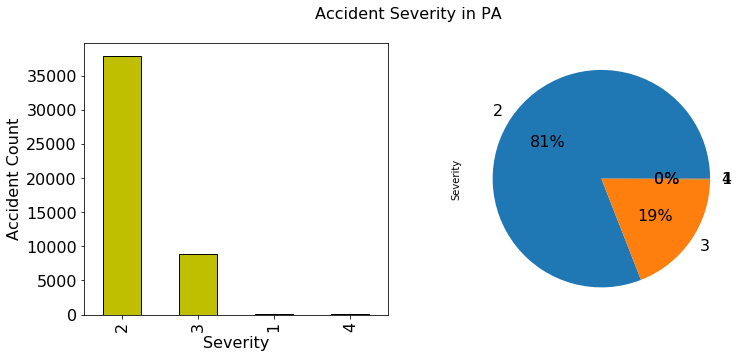

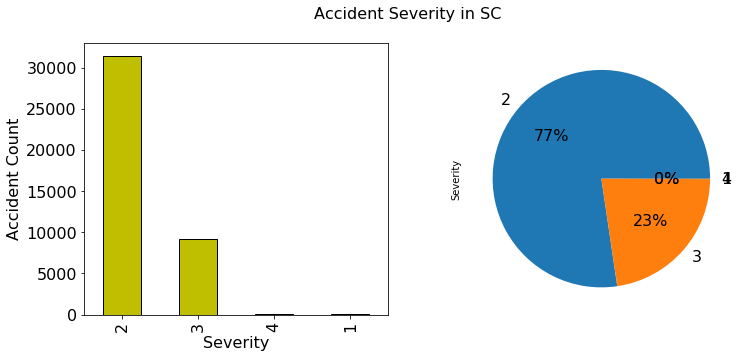

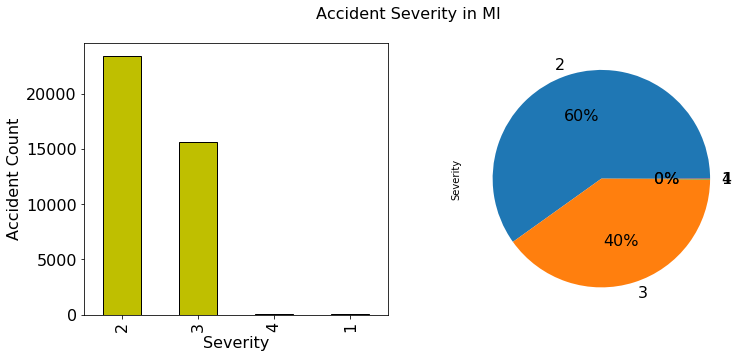

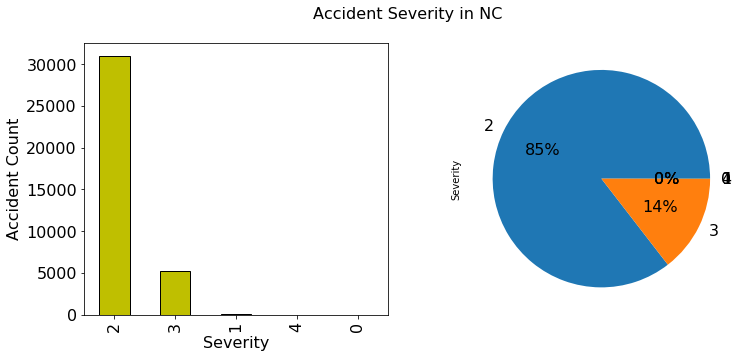

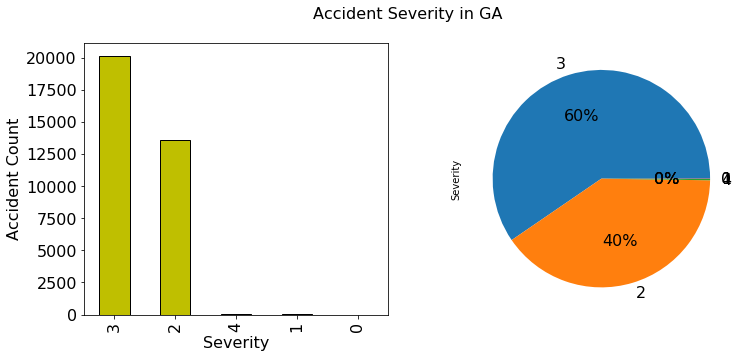

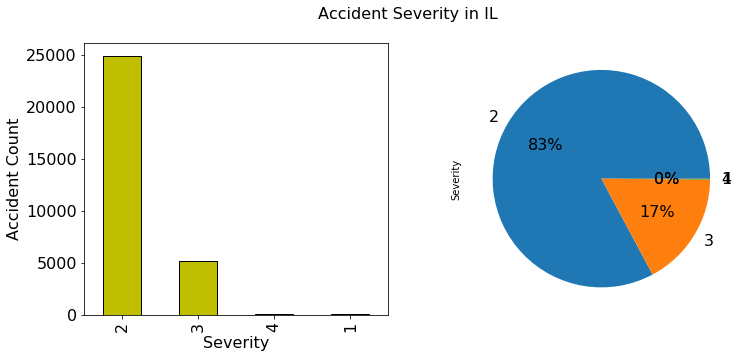

In [9]:
# We will draw pieplots and barplots for the distributions of severities in each of these 10 states.
# We will perform a for loop to choose the date for these states
for s in ["CA","TX", "FL","NY","PA","SC", "MI","NC","GA","IL"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity in ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

These graphs clearly state that the severity distribution differs from state to state. So state is a variable that may affect the severity of an accident.

Severity is a discrete numerical variable in ordinal level, so mean severity my have meaning in the context:

In [10]:
# We will define the top severity state by getting the mean of the severities of each states
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

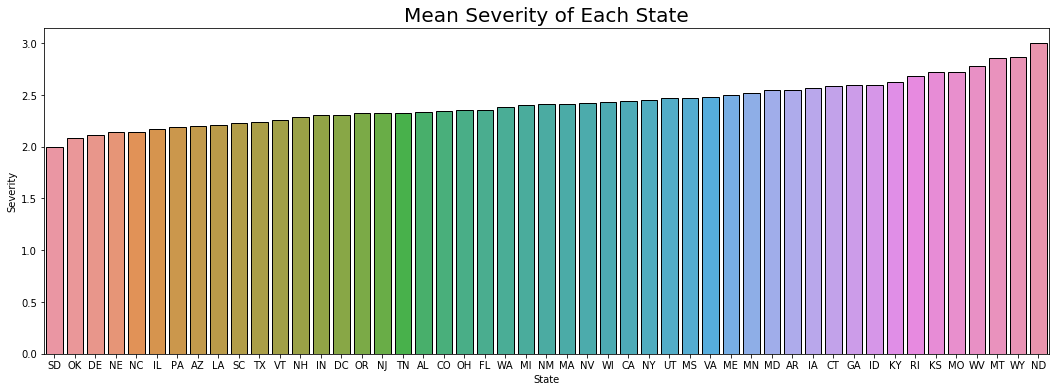

In [11]:
# Now we can show the mean severities of each state on a bar graph
plt.figure(figsize=(18,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State,edgecolor='k')
plt.title("Mean Severity of Each State", fontsize=20)
plt.show()

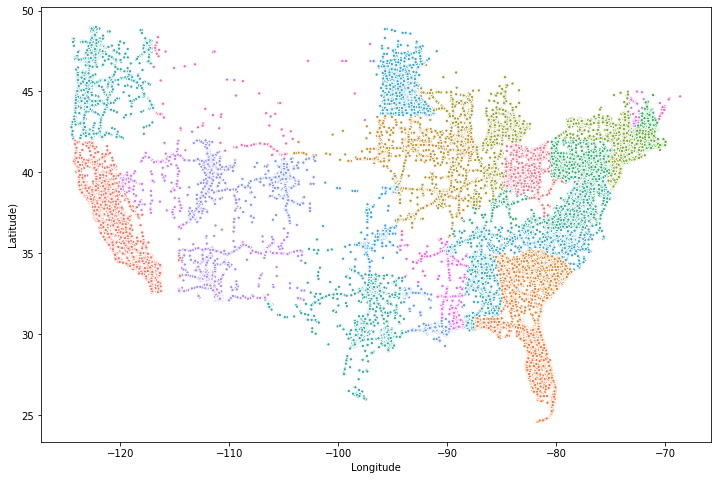

In [12]:
# Let'scheck the accident data on a map by coloring each state with a different color
plt.figure(figsize=(12,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='State', data=df, s=10, legend = False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

Even though this graph can shows the distribution of the accidents in each state, it does not clearly shows the clusters.

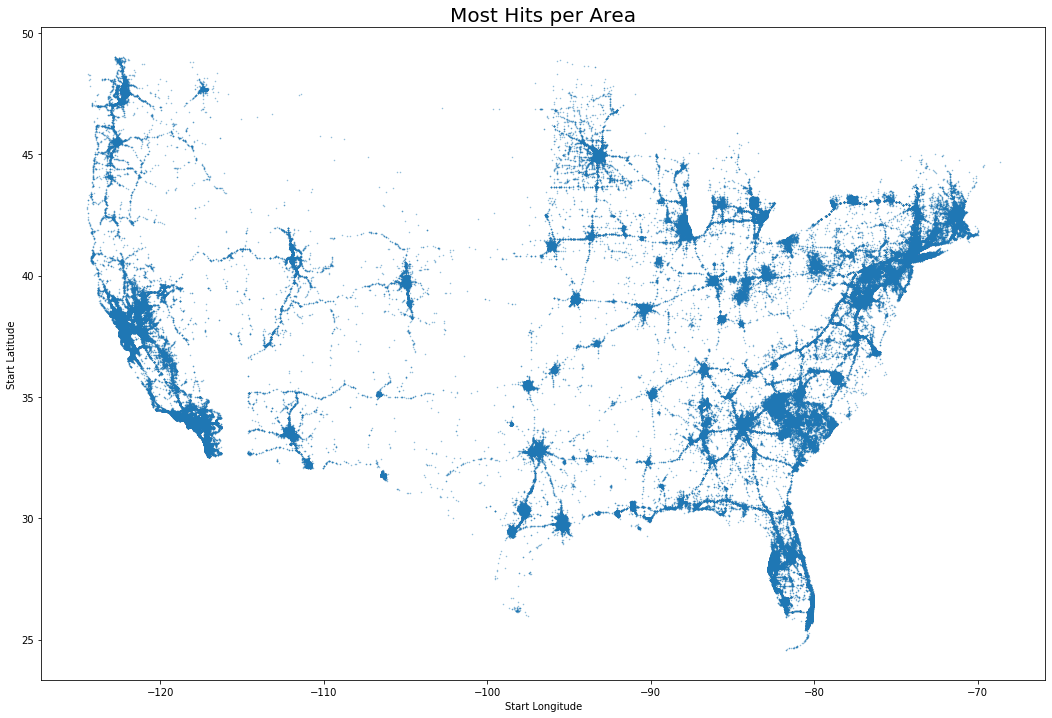

In [13]:
# If we remove 'hue'=State, we can observe which areas and which roads have more accidents than the others
plt.figure(figsize=(18,12))
plt.title('Most Hits per Area', fontsize=20)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(df.Start_Lng, df.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

The graph above shows all the accidents in the USA, and we can easily see that the accidents are clustered in metropolitan areas and major highways. However, it does not indicate the severity of accidents.

In order to show the severity of an accident, we choose the State of Texas to see how more severe accidents are clustered:

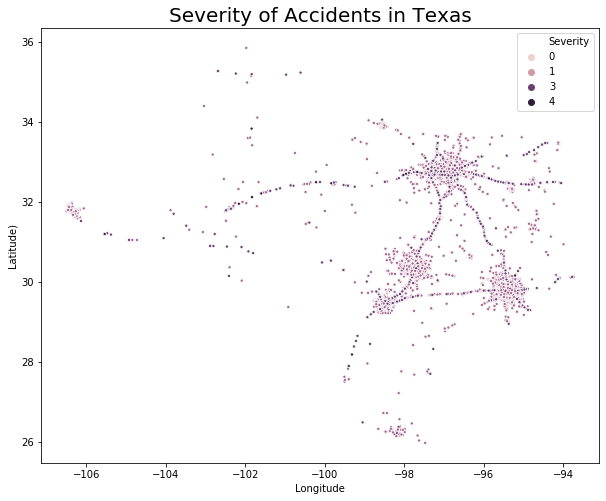

In [14]:
# Here we can see the map of the severity of the accidents in Texas colorcoded with the severity of the accidents
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=df.loc[df.State=='TX'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in Texas', fontsize=20)
plt.show()

We can perform a similar scatter plots to see the distibution of severities of accidents in each city. I chose Los Angeles, since Los Angeles is a unique name for Los Angeles, CA in this dataset

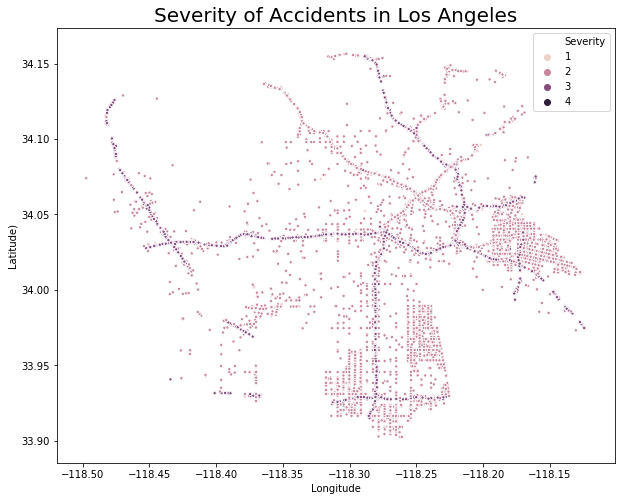

In [15]:
# Here we can see the map of the severity of the accidents in Los Angeles colorcoded with the severity of the accidents
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=df.loc[df.City=='Los Angeles'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in Los Angeles', fontsize=20)
plt.show()

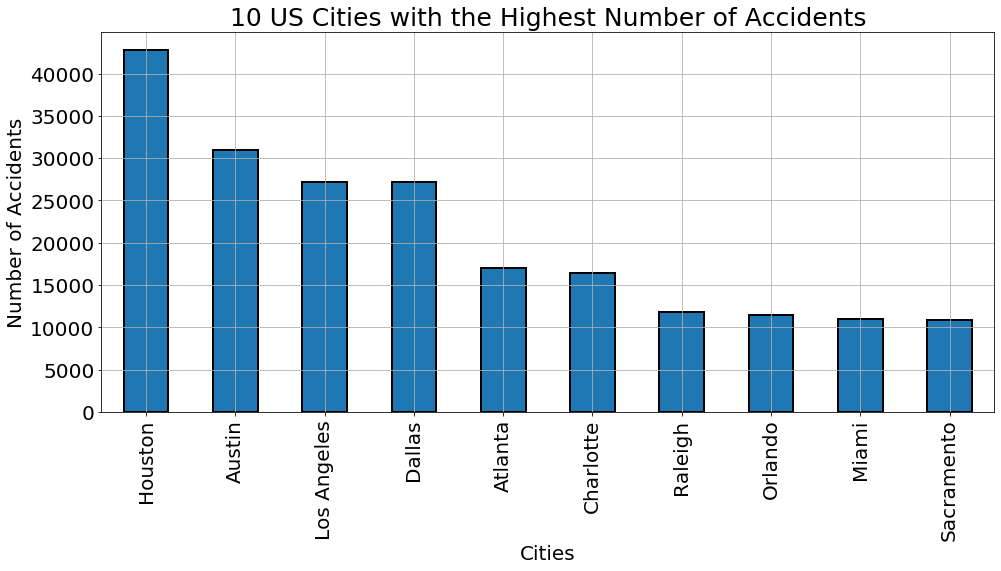

In [16]:
# Now, we will plot a bar plot to visualize to see which cities have the highest number of accidents
top_ten_cities = df['City'].value_counts().head(10)
fig, ax=plt.subplots(figsize=(16,7))
top_ten_cities.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('10 US Cities with the Highest Number of Accidents',fontsize=25)
plt.grid()

Now, we will check which cities have the highest mean of severities. One of the problem is many cities have only one car accident data, and if their accident's severity is 4, their mean will be 4, which will be misleading. We will sort the cities which has more than 100 car accidents to see which cities have a high number of accidents with a high mean severity.

Text(0.5, 1.0, 'Top 10 Cities with Highest Mean Severities')

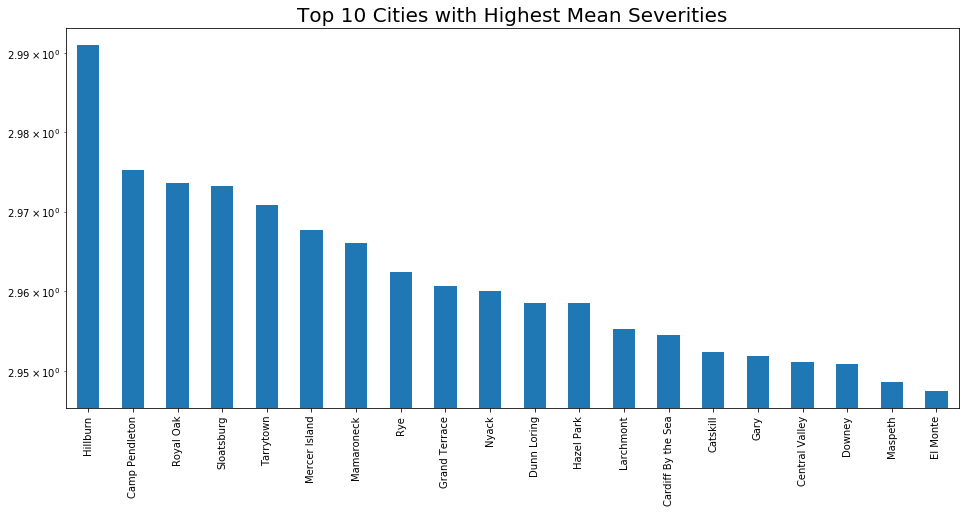

In [17]:
# Sort the cities according to the amount of accidents
city_vals = df['City'].value_counts()
# Choose the cities with more than 100 accidents
big_cities = city_vals.index.values[city_vals>100]
df_top_Severity_City = df.groupby('City').agg({'Severity': 'mean'})

# Create a dictionary with city as a key and mean severity as values
big_city_severities ={}
for city, row in df_top_Severity_City.iterrows():
    if city in big_cities:
        big_city_severities[city] = row['Severity'] 
        
# Convert the dictionary to Pandas Series
x = pd.Series(big_city_severities)

#Plot the graph. We will use logyscale since the mean values are preety close to each other
fig, ax=plt.subplots(figsize=(16,7))
x.sort_values(ascending = False).head(20).plot(kind = 'bar', logy=True)
plt.title("Top 10 Cities with Highest Mean Severities", fontsize=20)

### 3. Severity of Accidents with different weather conditions

The other question is how the amount of accidents are distributed in different weather condions. also, we would like to see how some common weather conditions affect the severity of accidents

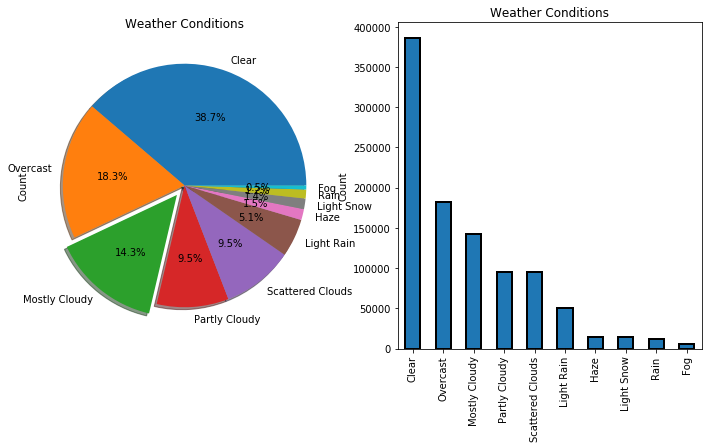

In [18]:
# Top 10 Accident conditions
f,ax=plt.subplots(1,2,figsize=(12,6))
df_top_weather_conditions = df.groupby('Weather_Condition').size().sort_values(ascending=False).iloc[:10]
df_top_weather_conditions.plot.pie(explode=[0,0,0.1,0,0,0,0,0,0,0],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Weather Conditions')
ax[0].set_ylabel('Count')
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,ax=ax[1],edgecolor='k',align='center',linewidth=2)
ax[1].set_title('Weather Conditions')
ax[1].set_ylabel('Count')
plt.show()

In [19]:
# This table shows the number of accidents for each conditions
pd.DataFrame(df_top_weather_conditions) 

,0
Weather_Condition,
Clear,386111
Overcast,182238
Mostly Cloudy,142518
Partly Cloudy,95093
Scattered Clouds,94684
Light Rain,50388
Haze,14561
Light Snow,13948
Rain,11829


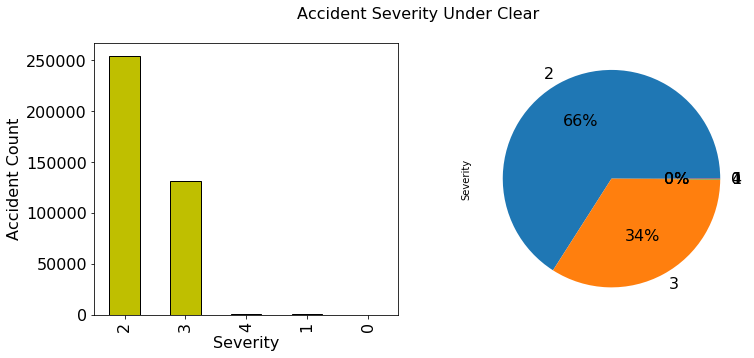

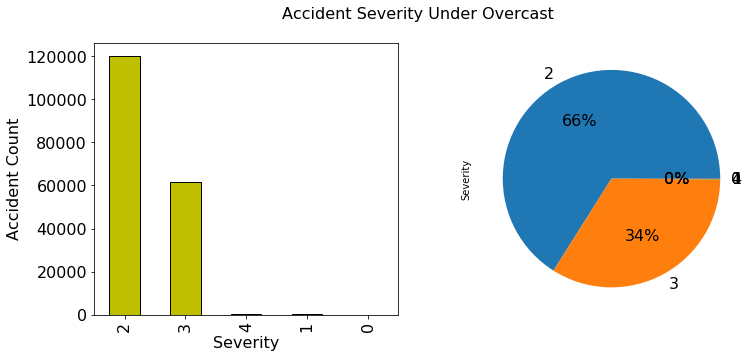

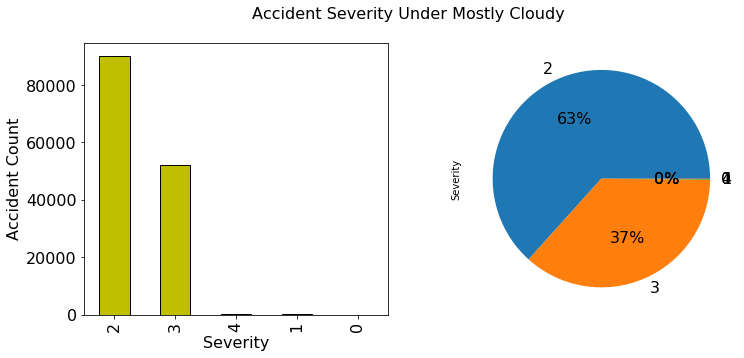

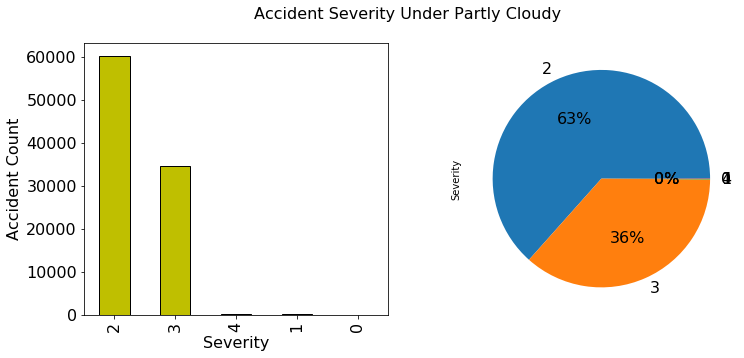

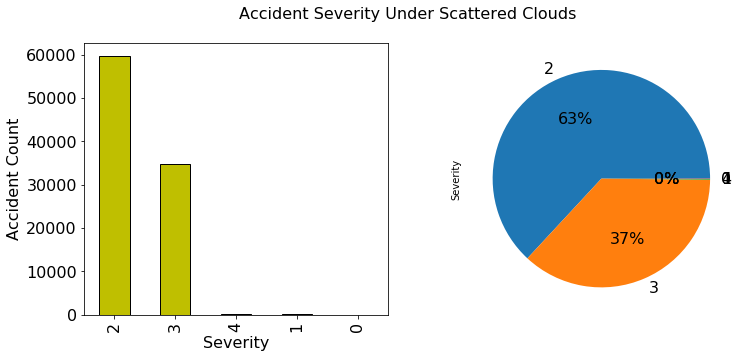

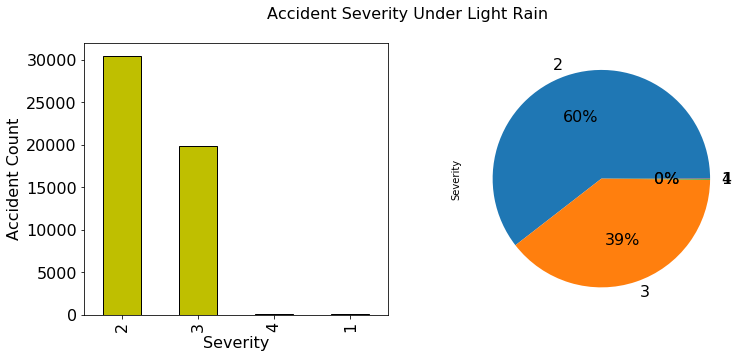

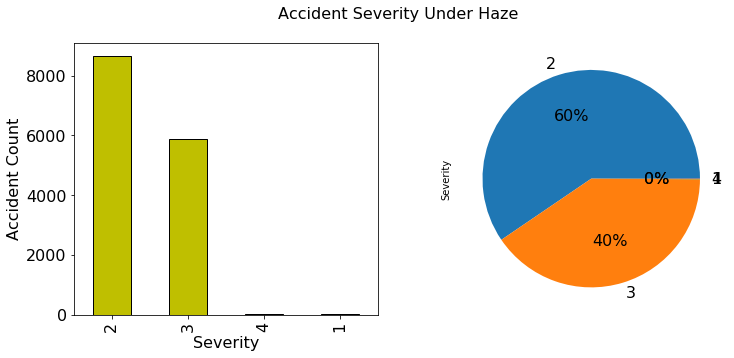

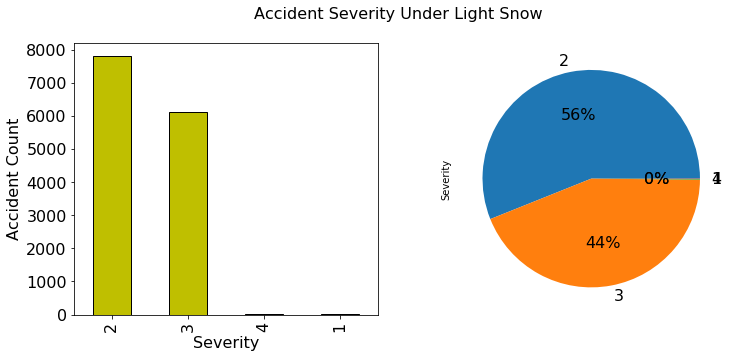

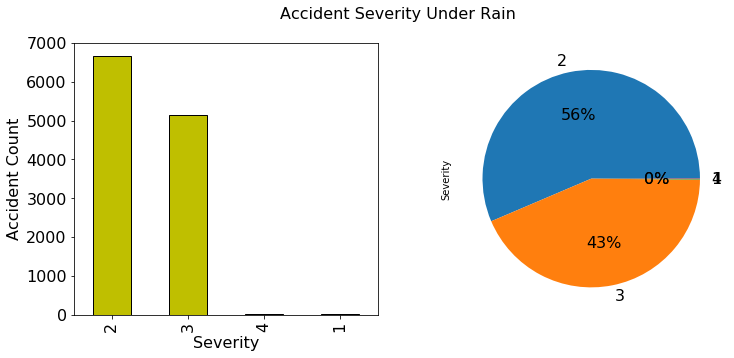

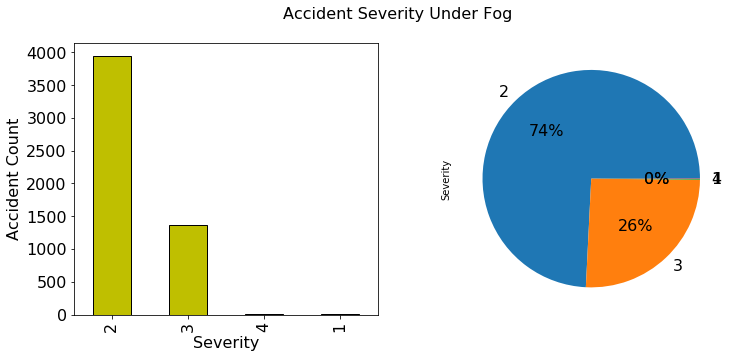

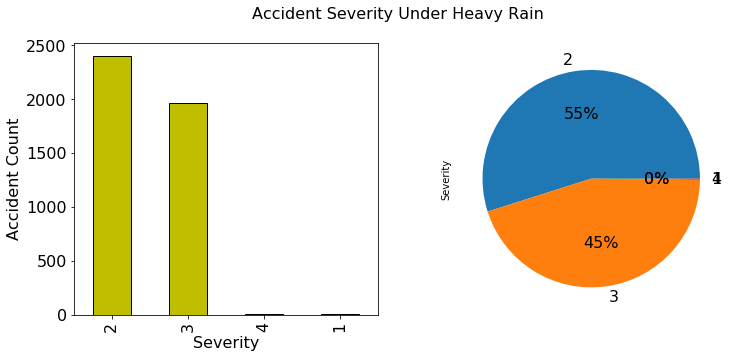

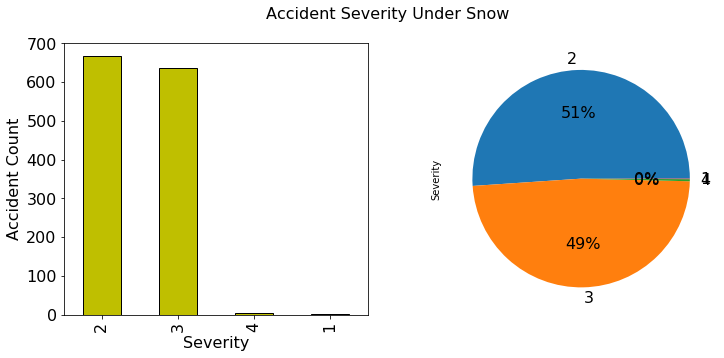

In [20]:
# We will perform a for loop to plot one pieplot and one bar plot for each conditions
for s in ["Clear","Overcast","Mostly Cloudy","Partly Cloudy","Scattered Clouds","Light Rain","Haze","Light Snow","Rain","Fog","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

These graphs suggest that the waether conditions have a significant impact on severity of an accident.

### 4. Does Side Type Has an Effect on Accidents & Severity? 

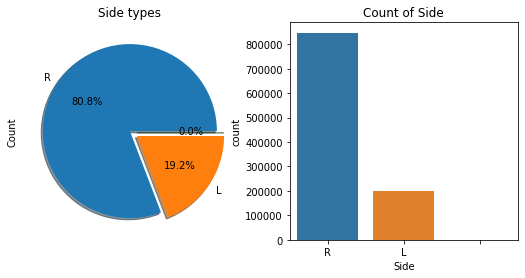

In [21]:
# Percent of Side Types
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

This graph suggest that more accidents happens on right side. However, does the side have an affect on the severity?

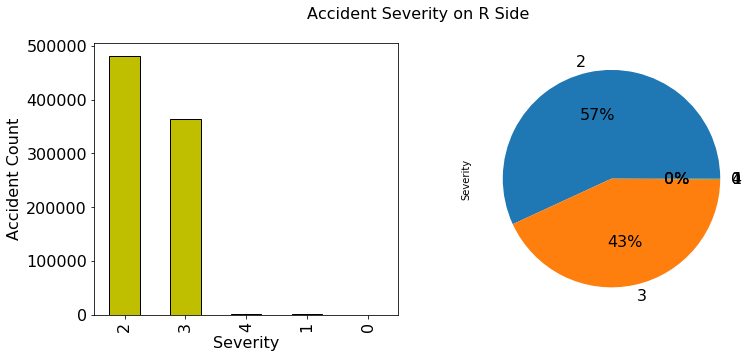

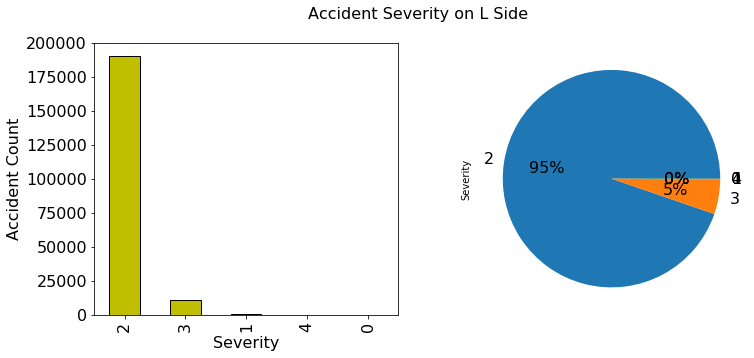

In [22]:
for s in ["R","L"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity on ' + s+" Side",fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Side"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Side"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

This graph suggests that the Left Side accidents are more likely to be less severe.

### 5. How does Boleans Affect the Accident & Severity

In this dataset, there are some boolean values that determines whether the accident happened near a traffic signal, stop sign, etc. We will See how proximity to an object affects the accident number and severity

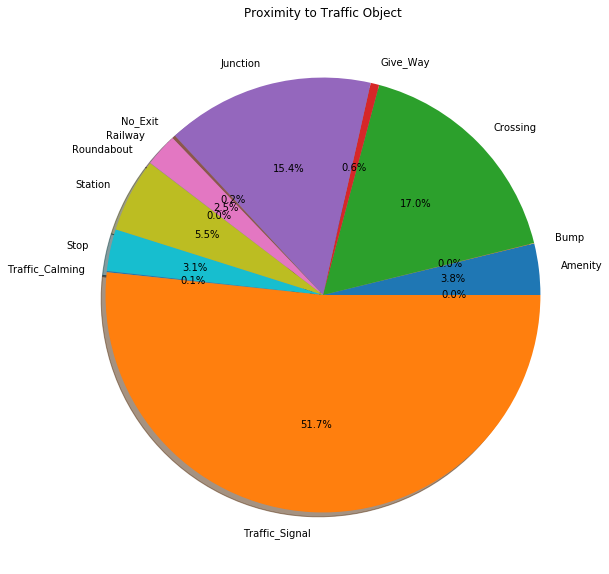

In [23]:
# Firstly we will identify columns with boolean datatypes
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
bools = df[bool_cols].sum(axis=0)

# Now we will plot a pieplot.
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

One problem about this pie chart is, some of the accidents may have more than one boolean values.

In [24]:
not_one_hot = df[bool_cols][df[bool_cols].sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 70064 non one hot metadata rows, which are 6.7% of the data


<Figure size 432x288 with 0 Axes>

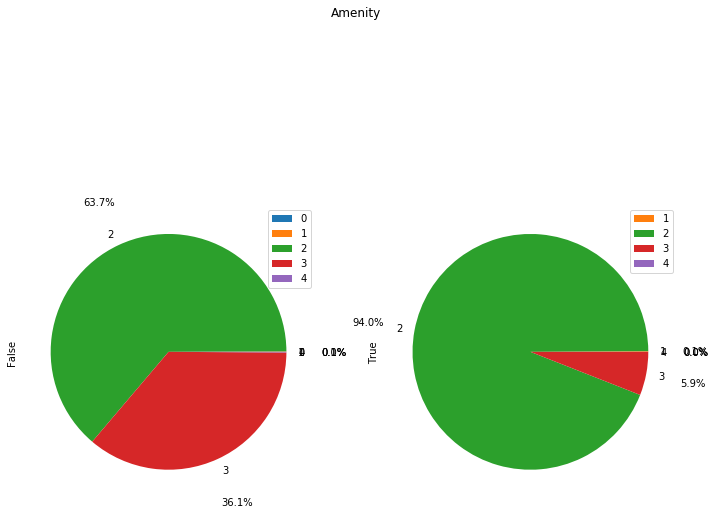

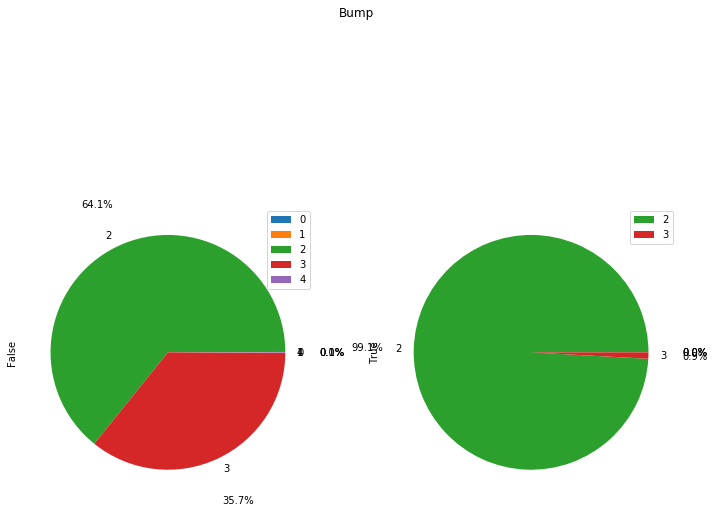

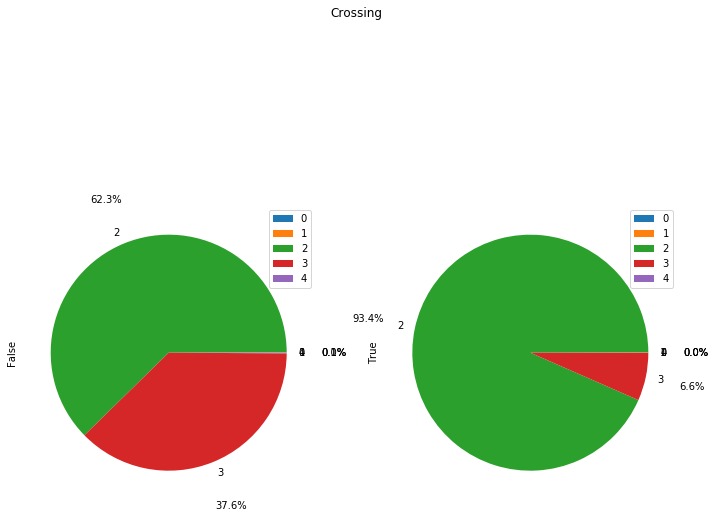

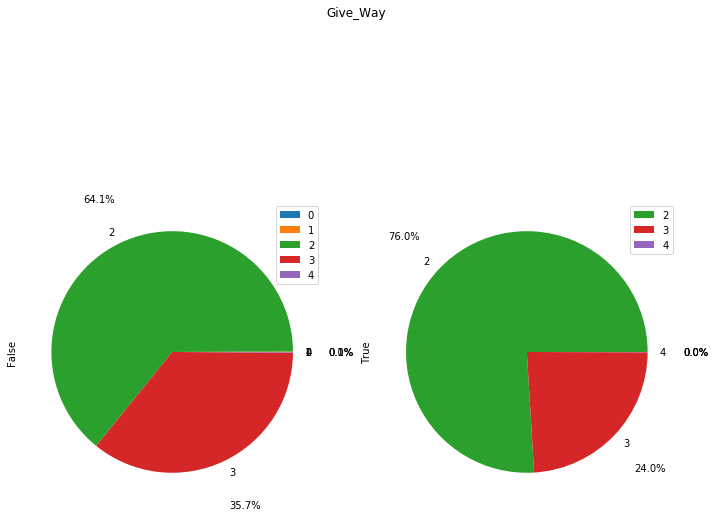

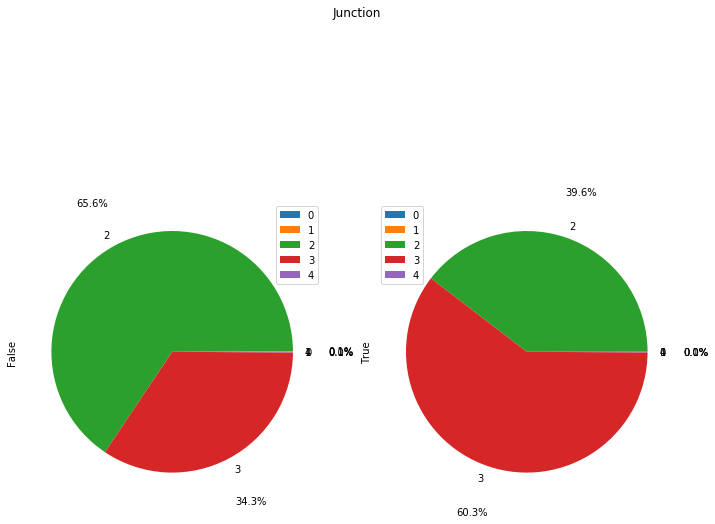

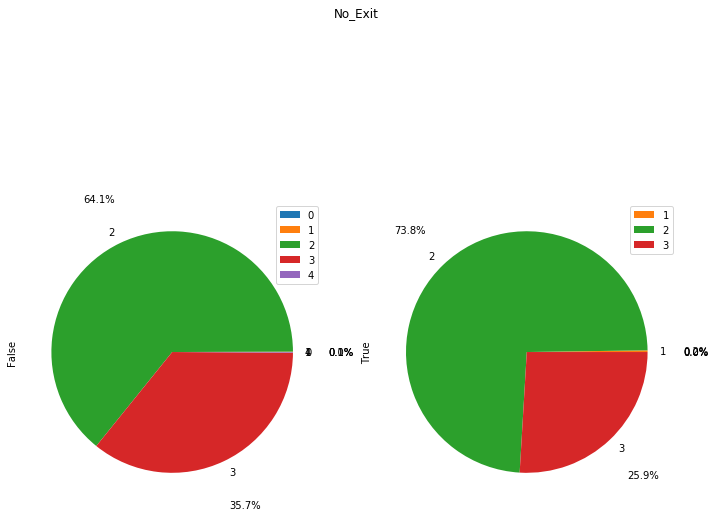

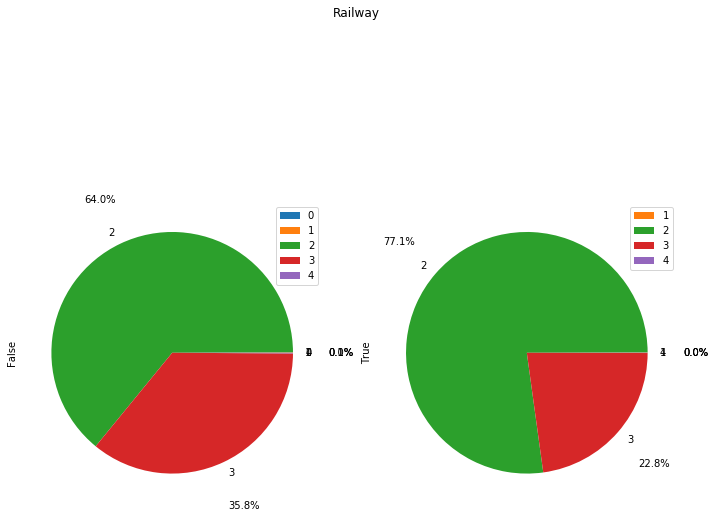

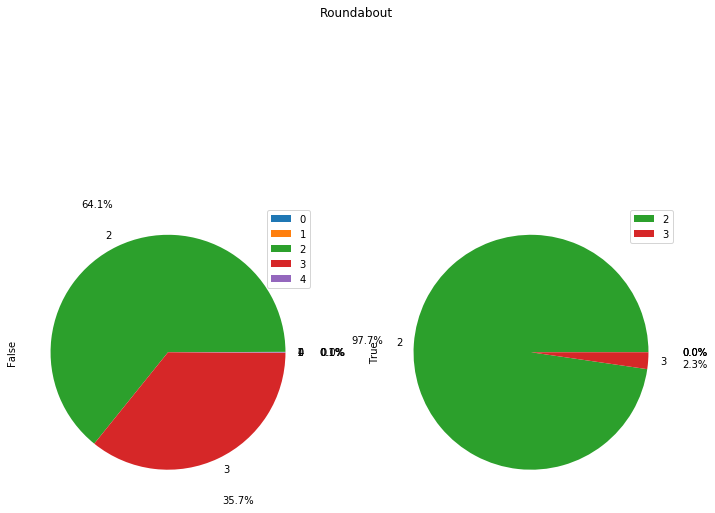

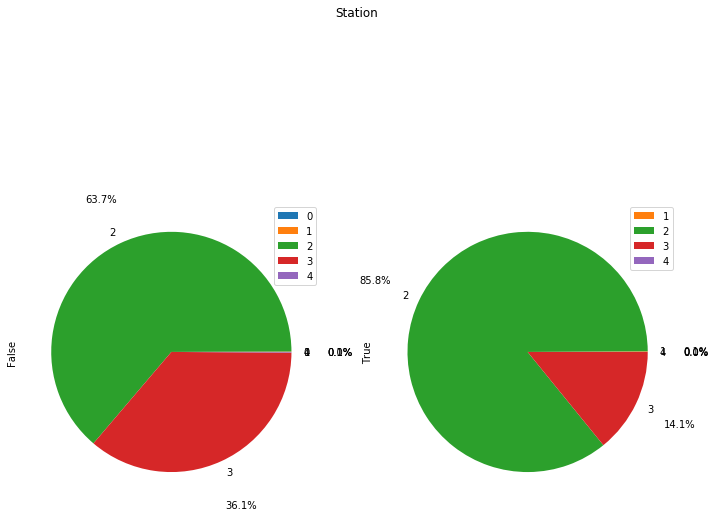

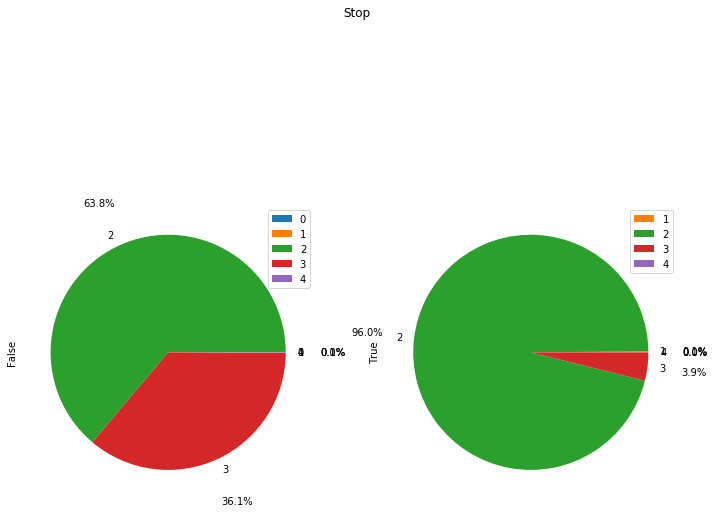

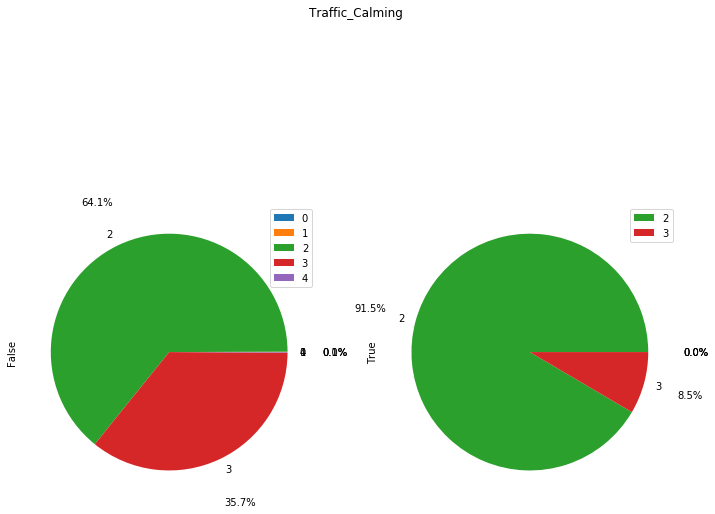

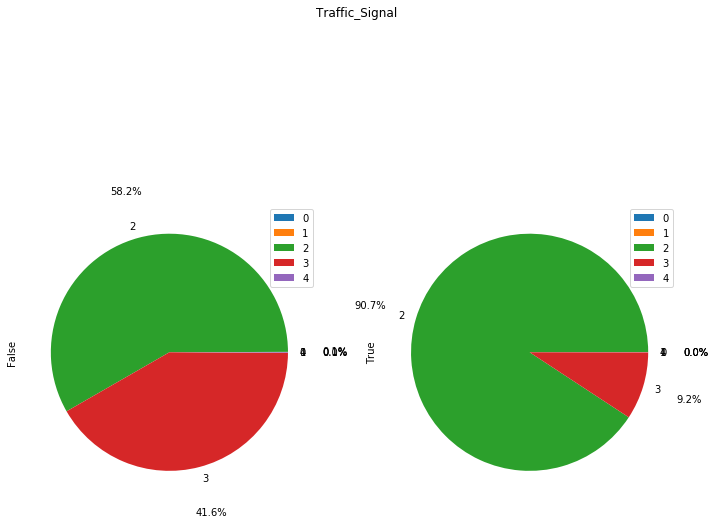

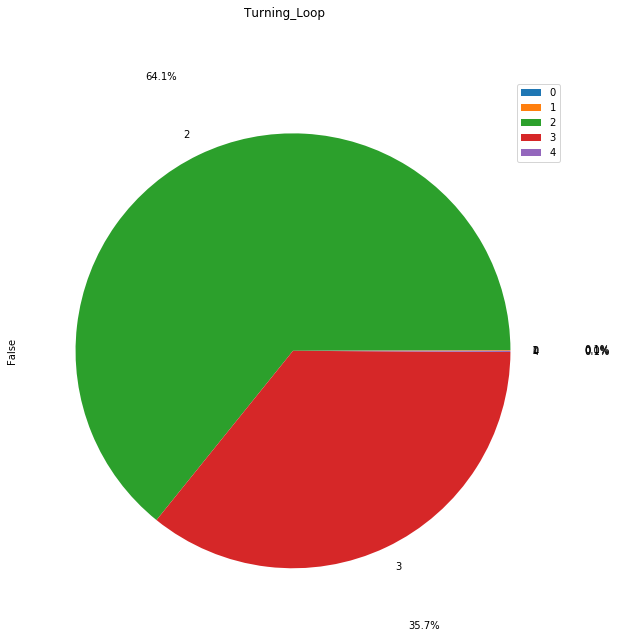

In [25]:
# Now we will check how the distribution of severity differs for True and False values for each booleans.
df_list=[]
def  bool_severity(col):
    df_bool = df.groupby([col,'Severity'])['ID'].count()
    df_bool = df_bool.unstack(col)
    df_list.append(df_bool)
for col in bool_cols:
    bool_severity(col)
for i in range(len(bool_cols)):
    plt.tight_layout()
    df_list[i].plot(kind='pie',subplots=True,autopct='%.1f%%',pctdistance=1.4,figsize=(10,10),title = bool_cols[i])

### 6. How the Number of Accidents & Severities are Associated with Days of Week?

In [26]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.weekday_name
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

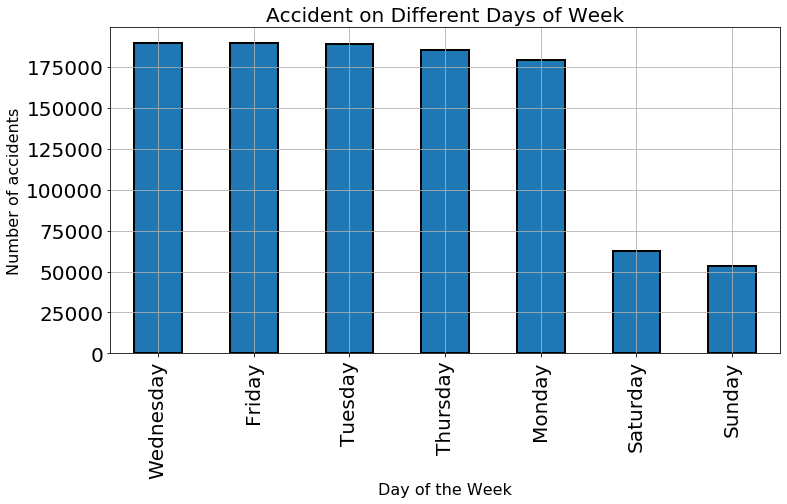

In [44]:
fig, ax=plt.subplots(figsize=(12,6))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=20)
plt.grid()
plt.show()

The graph above suggest that the number of accidents on weekdays are pretty close, but there are significantly less accidents on the weekends.

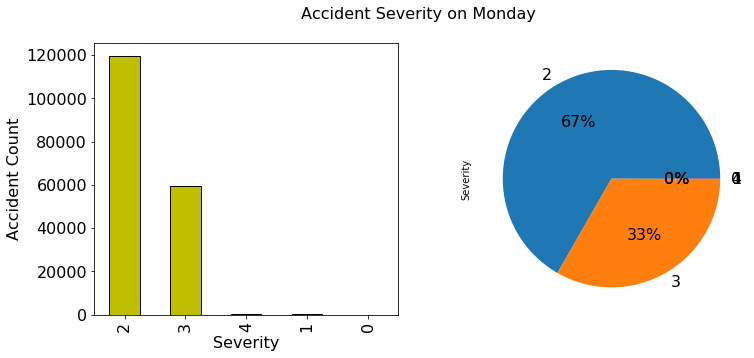

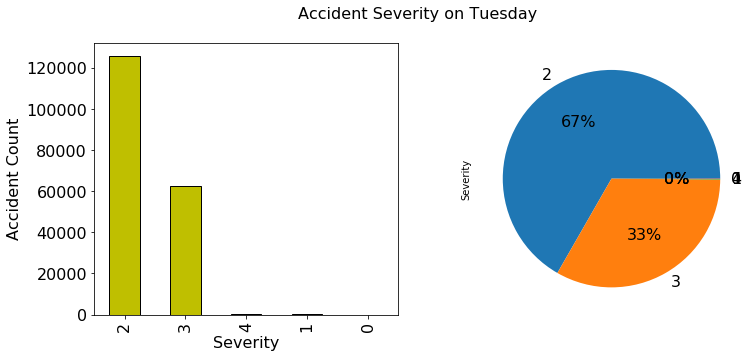

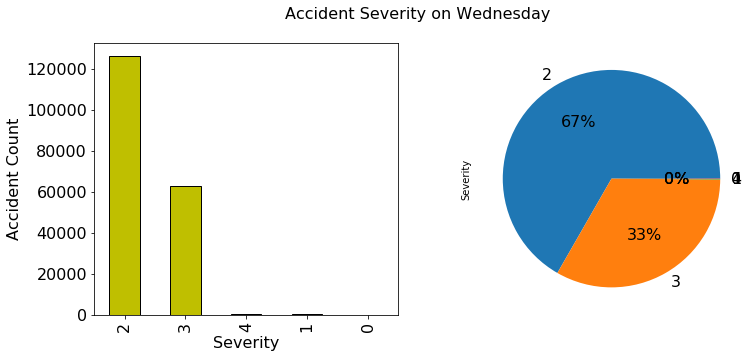

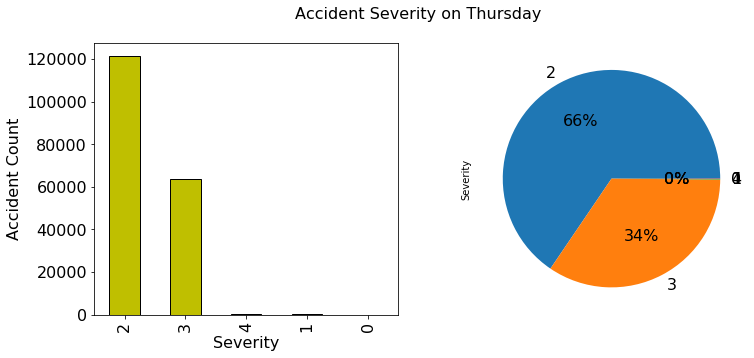

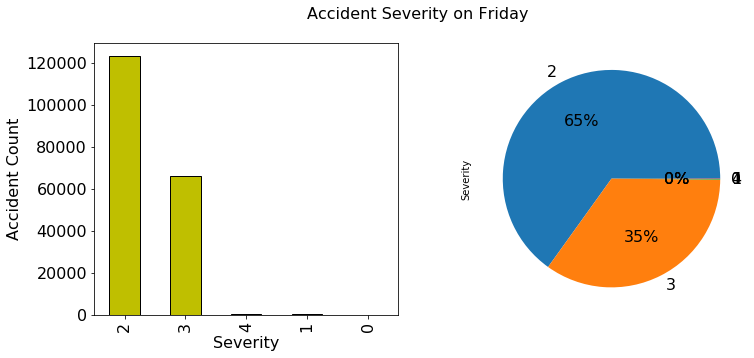

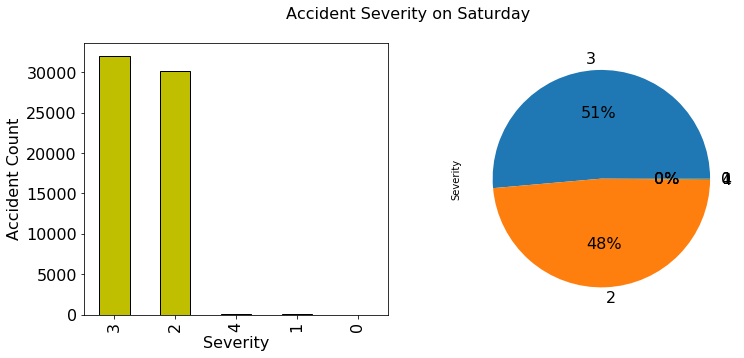

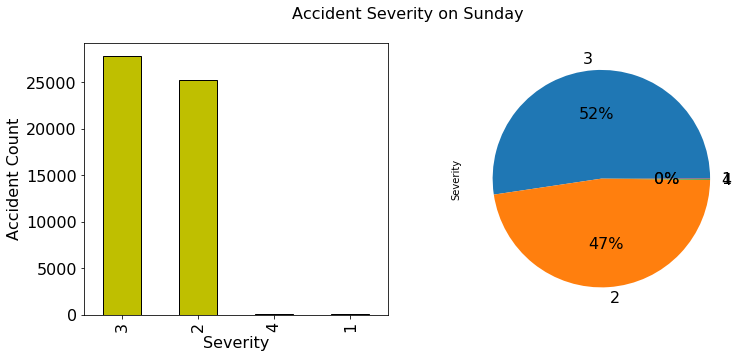

In [51]:
# We will check the severity distribution of the accidents on Day Of Weeks
for s in ["Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity on ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["DayOfWeek"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["DayOfWeek"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

According to the graphs, the accident severity changes between the weekdays slightly. However, the severity distribution on weekends are significantly different than the weekdays. We can perform similar analysis for other cyclical variables as months, hour, etc.

### 7. Visualization of Severity vs. Contnious Numeric Variables

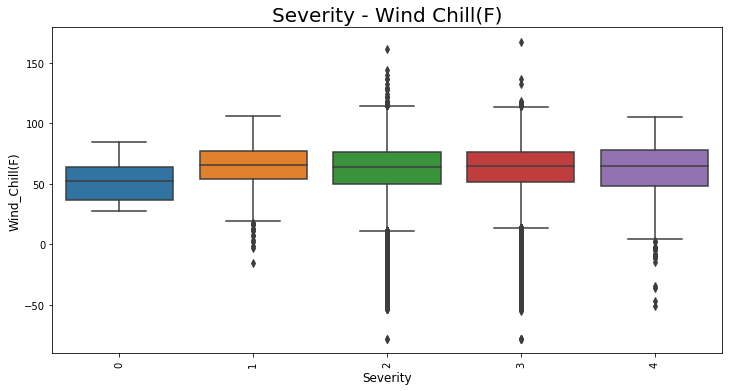

In [54]:
# Sketch a Boxplot for Severity vs. Wind Chill(F)
plt.figure(figsize=(12,6))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=df)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Severity - Wind Chill(F)",fontsize=20)
plt.show()

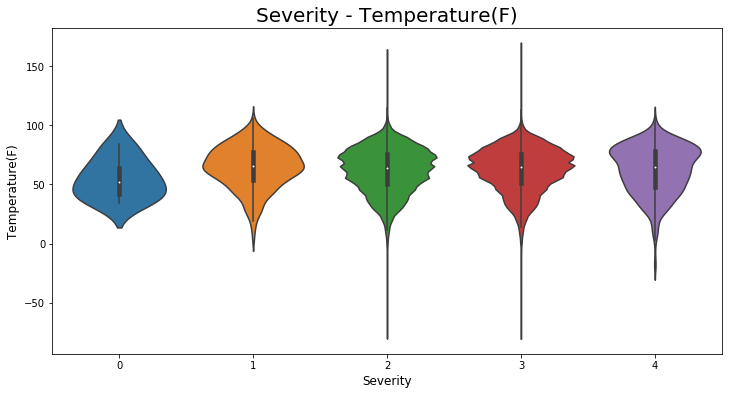

In [55]:
# Sketch a Violin Plot for Severity vs. Temperature(F)
plt.figure(figsize=(12,6))
sns.violinplot(x='Severity', y='Temperature(F)', data=df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Temperature(F)', fontsize=12)
plt.title("Severity - Temperature(F)",fontsize=20)
plt.show()

In the following graph, we will observe how the mean severity changes with respect to some continuous variables:

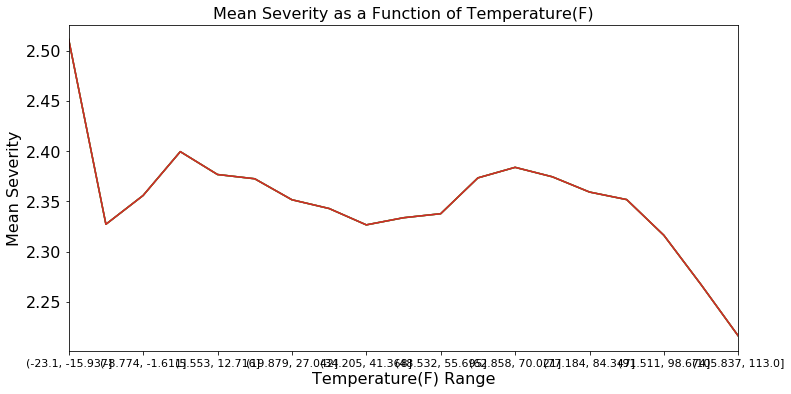

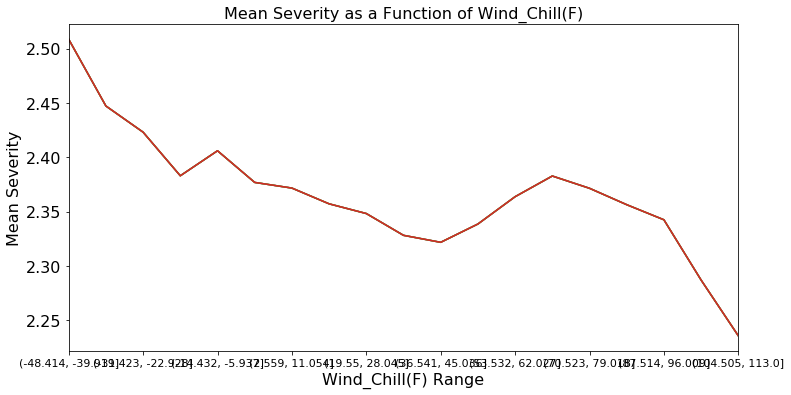

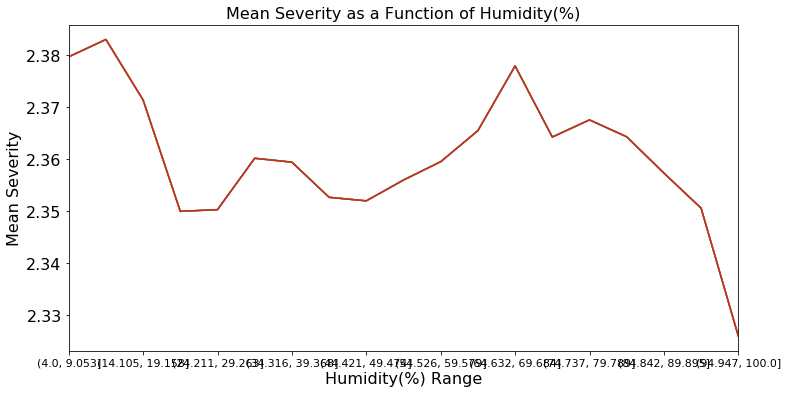

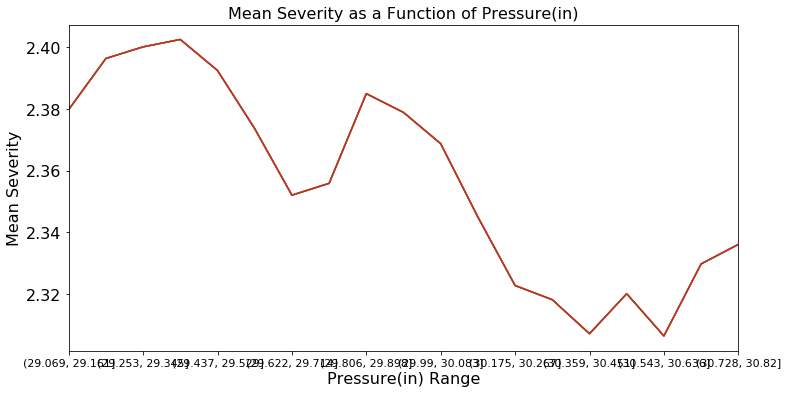

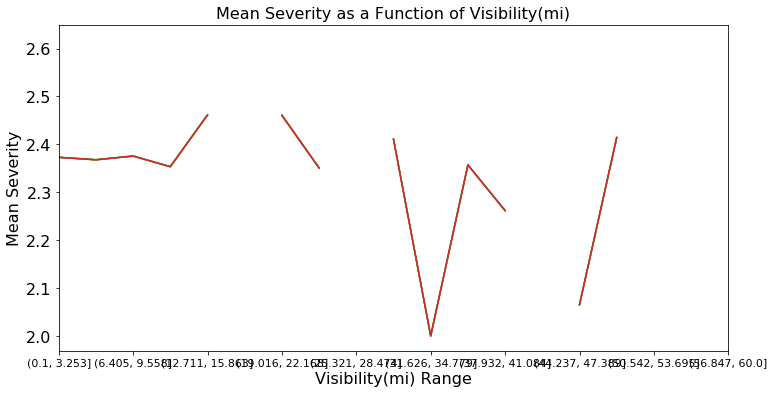

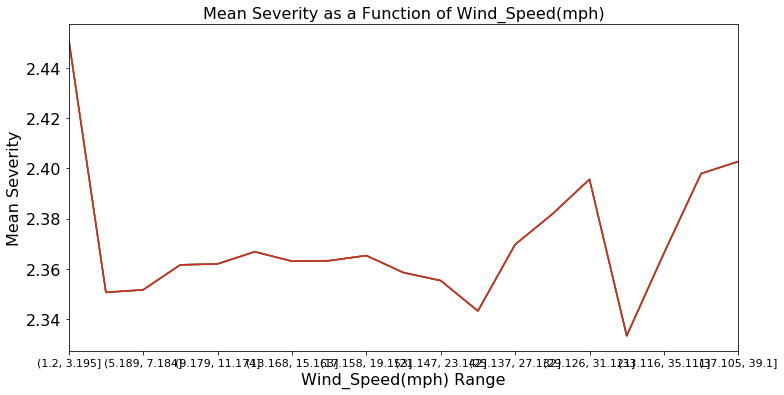

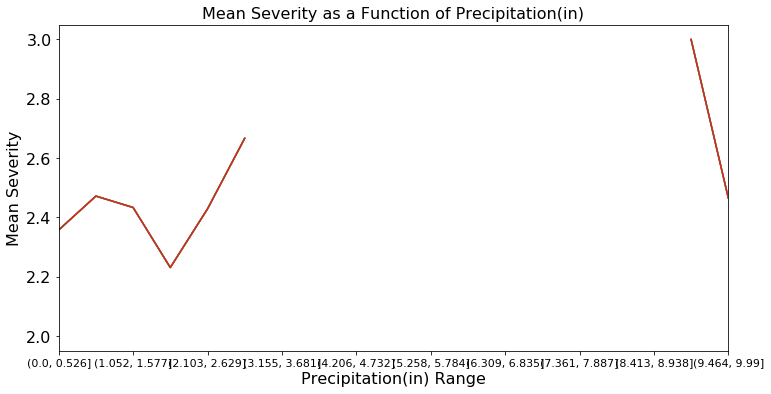

In [53]:
factors = ['Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for factor in factors:
    # remove some of the extreme values
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
    plt.subplots(figsize=(12,6))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

### 8. Perform a t-test 

We can perform t-test to see if the severity changes significantly between two groups. However, the dataset is very large with more than 1 million values, which makes the standard error very small. We expect to get very large t-values. Just to see the significance, I will perform a

In [36]:
# We will import the libraries
from scipy import stats
from scipy.stats import ttest_ind

In [56]:
stats.ttest_ind(df['Severity'][df['Junction'].astype(bool)].dropna(), df['Severity'][~df['Junction'].astype(bool)].dropna(), equal_var=False)

Ttest_indResult(statistic=123.45381748295537, pvalue=0.0)